In [101]:

print("isnain Fauziah 200411100007 (Ketua)")
print("Nella Adrisia Hartono 200411100107 (anggota)")

isnain Fauziah 200411100007 (Ketua)
Nella Adrisia Hartono 200411100107 (anggota)


In [102]:
pip list

Package                      Version             
---------------------------- --------------------
absl-py                      1.4.0               
asttokens                    2.2.1               
astunparse                   1.6.3               
attrs                        19.3.0              
Automat                      0.8.0               
Babel                        2.6.0               
backcall                     0.2.0               
blinker                      1.4                 
cachetools                   5.3.1               
certifi                      2019.11.28          
chardet                      3.0.4               
Click                        7.0                 
cloud-init                   22.3.4              
colorama                     0.4.3               
comm                         0.1.3               
command-not-found            0.3                 
configobj                    5.0.6               
constantly                   15.1.0              


In [103]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


<Axes: xlabel='Month'>

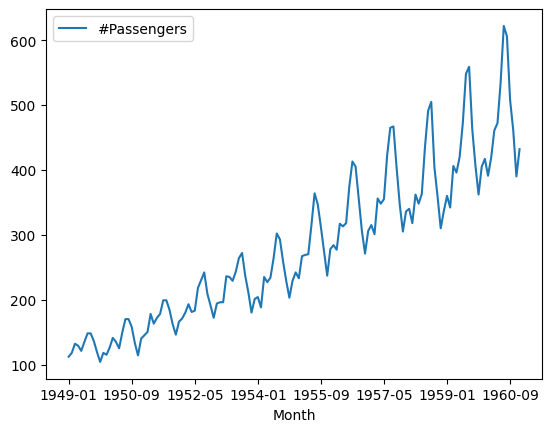

In [104]:
import pandas as pd
import matplotlib.pyplot as plt 

df = pd.read_csv("AirPassengers.csv")

df.plot(x='Month', y ='#Passengers')

In [105]:
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

In [106]:
training_set = df.iloc[:115, 1:2].values
test_set = df.iloc[:29, 1:2].values

In [107]:
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
x = 5
for i in range(x, 115):
    X_train.append(training_set_scaled[i-x:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
#(740, 60, 1)

In [108]:
y_train.shape

(110,)

In [109]:

xtrainbaru = np.reshape(X_train, (110, 5))

In [110]:
xtrainbaru

array([[0.02067183, 0.03617571, 0.07235142, 0.06459948, 0.04392765],
       [0.03617571, 0.07235142, 0.06459948, 0.04392765, 0.08010336],
       [0.07235142, 0.06459948, 0.04392765, 0.08010336, 0.11369509],
       [0.06459948, 0.04392765, 0.08010336, 0.11369509, 0.11369509],
       [0.04392765, 0.08010336, 0.11369509, 0.11369509, 0.08268734],
       [0.08010336, 0.11369509, 0.11369509, 0.08268734, 0.03875969],
       [0.11369509, 0.11369509, 0.08268734, 0.03875969, 0.        ],
       [0.11369509, 0.08268734, 0.03875969, 0.        , 0.03617571],
       [0.08268734, 0.03875969, 0.        , 0.03617571, 0.02842377],
       [0.03875969, 0.        , 0.03617571, 0.02842377, 0.05684755],
       [0.        , 0.03617571, 0.02842377, 0.05684755, 0.09560724],
       [0.03617571, 0.02842377, 0.05684755, 0.09560724, 0.08010336],
       [0.02842377, 0.05684755, 0.09560724, 0.08010336, 0.05426357],
       [0.05684755, 0.09560724, 0.08010336, 0.05426357, 0.11627907],
       [0.09560724, 0.08010336, 0.

In [111]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=3)
modelknn=neigh.fit(xtrainbaru, y_train)

In [122]:

# Definisikan dataset_train dan dataset_test
dataset_train = df.iloc[:115, 1:2]  # Menggunakan 45 baris pertama sebagai data latihan
dataset_test = df.iloc[29:, 1:2]  # Menggunakan baris setelah 45 sebagai data uji

# Menggabungkan dataset_train dan dataset_test
dataset_total = pd.concat([dataset_train, dataset_test], axis=0)

# Mengambil input dari dataset_total
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 5:].values

In [123]:
inputs = inputs.reshape(-1,1)


In [124]:

# Melakukan transformasi skalar pada data inputs
inputs = sc.fit_transform(inputs)

# Inisialisasi list untuk menyimpan data uji yang telah diolah
X_test = []

# Mengambil subset data sepanjang 5 nilai sebelumnya
for i in range(5, 24):
    X_test.append(inputs[i-5:i, 0])

# Mengubah list menjadi array NumPy
X_test = np.array(X_test)

# Mengubah bentuk array X_test menjadi (jumlah_sampel, panjang_waktu, 1)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Menampilkan bentuk dari X_test
print(X_test.shape)


(19, 5, 1)


In [126]:
xtestbaru = np.reshape(X_test, (19, 5))


In [127]:
predicted_pass = modelknn.predict(xtestbaru)

predicted_pass = predicted_pass.reshape(-1,1)
prediksi= sc.inverse_transform(predicted_pass)
dataset_test=dataset_test.iloc[0:19]


In [128]:
from sklearn.metrics import mean_absolute_percentage_error

mean_absolute_percentage_error(dataset_test, prediksi)

0.23976233632103833

In [115]:
#Naive Baiyes
